In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os, sys

sys.path.append('/Users/silas/Documents/switchdrive/')
import helper_scripts as hs

import seaborn as sns

import matplotlib_venn


from helper_scripts import DimensionalReduction,MetaTable

In [2]:
metadata= pd.read_table(f'../metadata.tsv',index_col=0)
working_dir='../WD/'

In [3]:
data= pd.read_hdf(f'{working_dir}/Genecatalog/counts/Nmapped_reads_clr.hdf',key='clr')

In [4]:

metadata= metadata.loc[ data.index]

More than 60 000 genes don't hava any reads mapped to it !

total:2255908

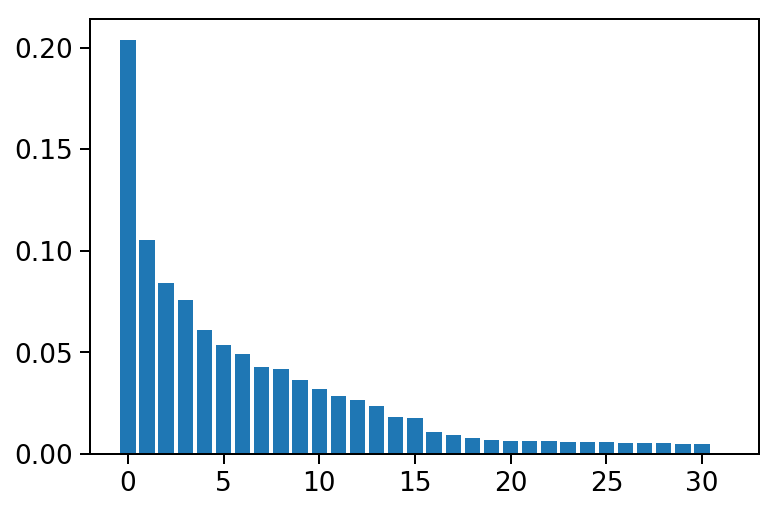

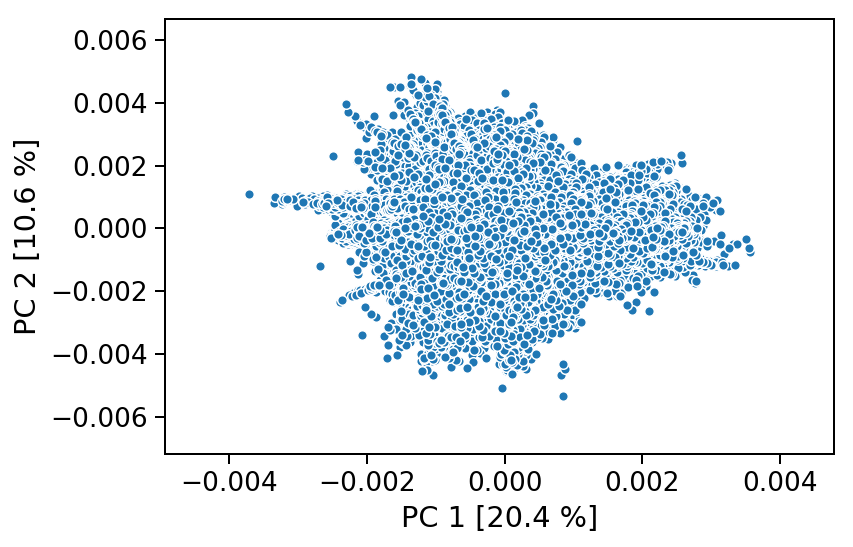

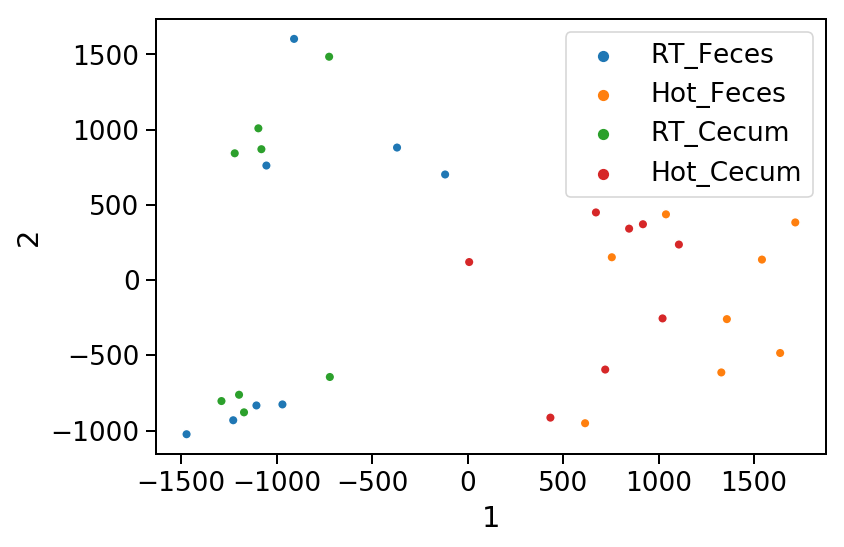

In [5]:
decomp= DimensionalReduction.DimensionalReduction(data) 


plt.bar(np.arange(decomp.decomposition.explained_variance_ratio_.shape[0]),
        decomp.decomposition.explained_variance_ratio_)
plt.show()
decomp.plot_Loadings_2D()

plt.show()

sns.scatterplot(decomp.transformed_data[1],decomp.transformed_data[2],hue=metadata.Group+'_'+metadata.Source)

In [6]:
decomp.components.loc[1].sort_values(ascending=True).head()

#ID
Gene0308996   -0.003707
Gene0684906   -0.003344
Gene2052924   -0.003330
Gene0791736   -0.003248
Gene0153983   -0.003234
Name: 1, dtype: float64

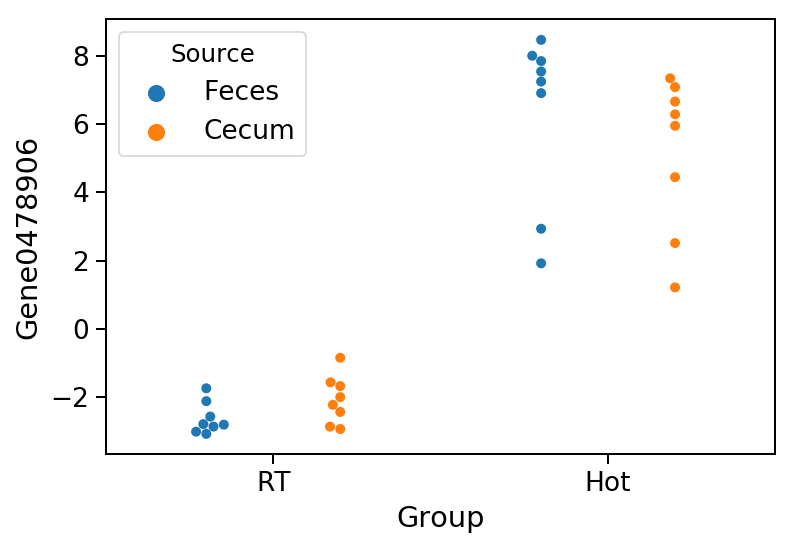

In [13]:
sns.swarmplot(y=data['Gene0478906'],x=metadata.Group,hue=metadata.Source,dodge=True)

# Kegg

In [19]:
Kegg= pd.read_csv(f'{working_dir}/Genecatalog/annotations/Kegg.tsv',sep='\t',
                  usecols=[0,1],header=None)

Kegg=Kegg.dropna()

In [28]:
intersection = data.columns.intersection(Kegg[0])
len(intersection)/data.shape[1]

In [32]:
len(intersection)/len(Kegg[0].unique())

0.9936807067142945

24 % of genes are annotated with Keggs

0.7 % of annotations fall on genes with no counts



In [23]:
G=Kegg.groupby([0,1]).size().unstack()

In [7]:
prensence_absence= G>0

NameError: name 'G' is not defined

In [22]:




K= data.groupby(Kegg,axis=1).mean()



ValueError: Grouper for '<class 'pandas.core.frame.DataFrame'>' not 1-dimensional

In [270]:
Kegg.groupby(Kegg).size()

1
K00003    313
K00004      1
K00005     12
K00008     36
K00009     82
K00010     57
K00012    247
K00013    172
K00014    299
K00016    113
K00018    137
K00020     46
K00024     44
K00027    100
K00029     50
K00030      9
K00031    221
K00033     62
K00036     21
K00041    132
K00042     17
K00046     57
K00048     47
K00052    208
K00053    430
K00054      6
K00055      1
K00057    313
K00058     71
K00059    444
         ... 
K22721      1
K22736      5
K22757     40
K22881      3
K22885      1
K22900    111
K22905     26
K22906      1
K22927    294
K22928      3
K22933     14
K22952      1
K22958      2
K22960      2
K22994     11
K23003      9
K23004      3
K23005      2
K23059     23
K23060     10
K23077      1
K23078     21
K23107     17
K23121      4
K23148     65
K23149      4
K23150     38
K23163      9
K23169     13
K23170     45
Name: 1, Length: 3696, dtype: int64

In [21]:
Kegg.loc[Kegg.index.duplicated(keep=False)].sort_index()

,0,1


In [254]:
data.shape

(32, 2255908)

In [253]:
Kegg.shape

(2266267,)